# The Nonrandom Market

In [1]:
from pandas_datareader import data  
from datetime import datetime
import pandas_datareader as pdr
import pandas as pd
pd.options.mode.chained_assignment = None

## Dax index from 1998 to mid 2011

In [2]:
start = datetime(1998,1,1)
end = datetime(2011,6,30)
# DAX PERFORMANCE-INDEX
df = pdr.get_data_yahoo('^GDAXI', start, end)

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1998-01-02,4368.000000,4270.689941,4270.689941,4364.319824,0.0,4364.319824
1998-01-05,4420.850098,4331.200195,4358.029785,4416.950195,0.0,4416.950195
1998-01-06,4427.330078,4345.819824,4427.299805,4360.049805,0.0,4360.049805
1998-01-07,4395.959961,4326.549805,4356.870117,4339.979980,0.0,4339.979980
1998-01-08,4400.939941,4274.000000,4359.350098,4293.640137,0.0,4293.640137
...,...,...,...,...,...,...
2011-06-24,7273.319824,7099.220215,7231.729980,7121.379883,167161100.0,7121.379883
2011-06-27,7144.439941,7079.109863,7101.149902,7107.899902,149929900.0,7107.899902
2011-06-28,7187.080078,7075.189941,7138.500000,7170.430176,137242600.0,7170.430176


<AxesSubplot:xlabel='Date'>

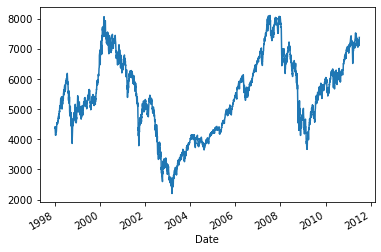

In [4]:
df['Close'].plot()

## Prepare data

In [5]:
df = df[['Open', 'Close']]
# down: close price < open price
df['down'] = df['Close'] < df['Open']
df['down_lag_1'] = df['down'].shift(1)
df['down_lag_2'] = df['down'].shift(2)
df['down_lag_3'] = df['down'].shift(3)
# buy on open, sell on close
df['diff'] = df['Close'] / df['Open']
df['day_name'] = df.index.day_name()

In [6]:
df

,Open,Close,down,down_lag_1,down_lag_2,down_lag_3,diff,day_name
Date,,,,,,,,
1998-01-02,4270.689941,4364.319824,False,NaN,NaN,NaN,1.021924,Friday
1998-01-05,4358.029785,4416.950195,False,False,NaN,NaN,1.013520,Monday
1998-01-06,4427.299805,4360.049805,True,False,False,NaN,0.984810,Tuesday
1998-01-07,4356.870117,4339.979980,True,True,False,False,0.996123,Wednesday
1998-01-08,4359.350098,4293.640137,True,True,True,False,0.984927,Thursday
...,...,...,...,...,...,...,...,...
2011-06-24,7231.729980,7121.379883,True,True,True,False,0.984741,Friday
2011-06-27,7101.149902,7107.899902,False,True,True,True,1.000951,Monday
2011-06-28,7138.500000,7170.430176,False,False,True,True,1.004473,Tuesday


## Buy after every down close, and exit on the same day’s close

1635 trades, 53.03% winners


<AxesSubplot:xlabel='Date'>

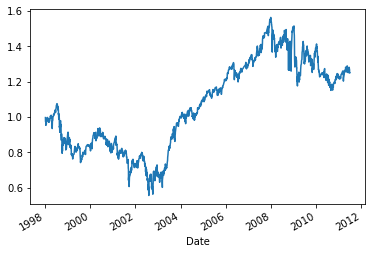

In [7]:
r_df = df[(df['down_lag_1'] == True)]
total_count = r_df.shape[0]
win_count = r_df[r_df['diff'] > 1].shape[0]
win_rate = win_count / total_count * 100
print(f'{total_count} trades, {win_rate:.2f}% winners')
r_df['diff'].cumprod().plot()

## Two consecutive down closes 

768 trades, 54.69% winners


<AxesSubplot:xlabel='Date'>

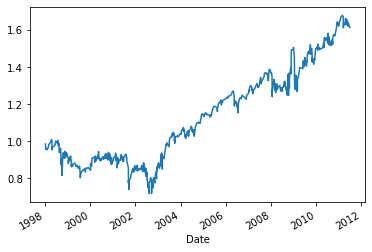

In [8]:
r_df = df[(df['down_lag_1'] == True) & (df['down_lag_2'] == True)]
total_count = r_df.shape[0]
win_count = r_df[r_df['diff'] > 1].shape[0]
win_rate = win_count / total_count * 100
print(f'{total_count} trades, {win_rate:.2f}% winners')
r_df['diff'].cumprod().plot()

## Three down closes in a row

348 trades, 54.89% winners


<AxesSubplot:xlabel='Date'>

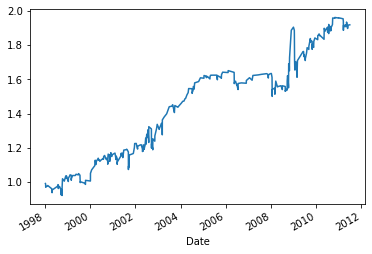

In [9]:
r_df = df[(df['down_lag_1'] == True) & (df['down_lag_2'] == True) & (df['down_lag_3'] == True)]
total_count = r_df.shape[0]
win_count = r_df[r_df['diff'] > 1].shape[0]
win_rate = win_count / total_count * 100
print(f'{total_count} trades, {win_rate:.2f}% winners')
r_df['diff'].cumprod().plot()

##  Some days of the week the Dax is more prone to rally than others, so let’s buy only on Tuesdays, Thursdays, and Fridays when there have been three down days in a row

216 trades, 56.94% winners


<AxesSubplot:xlabel='Date'>

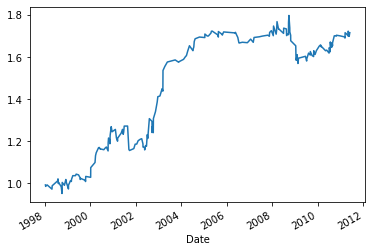

In [10]:
r_df = df[(df['down_lag_1'] == True) & (df['down_lag_2'] == True) & (df['down_lag_3'] == True) & 
          ((df['day_name'] == 'Tuesday') | (df['day_name'] == 'Thursday') | (df['day_name'] == 'Friday'))]
total_count = r_df.shape[0]
win_count = r_df[r_df['diff'] > 1].shape[0]
win_rate = win_count / total_count * 100
print(f'{total_count} trades, {win_rate:.2f}% winners')
r_df['diff'].cumprod().plot()